# Housing Data analysis
Analyst: Zac Lewis

This housing dataset was downloaded from Kaggle on 2022/08/25 (Y/m/d)

from https://www.kaggle.com/datasets/arathipraj/house-data
## About Dataset
### Content
The dataset consists of Price of Houses in King County , Washington from sales between May 2014 and May 2015. Along with house price it consists of information on 18 house features, date of sale and ID of sale.

### Attribute information
1. id - Unique id for each home sold
2. date - Date of the home saled
3. price - Price of each home sold
4. bedrooms - Number of bedrooms
5. bathrooms - Number of bathrooms
6. sqft _ living - Square footage of the apartments interior living space
7. sqft _ lot - Square footage of the land space
8. floors - Number of floors
9. waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
10. view - An index from 0 to 4 of how good the view of the property was
11. condition - an index from 1 to 5 on the condition of the apartment
12. grade - An index from 1 to 13 , where 1-3falls short of building
    construction and design, 7 has an average level of construction and design , and 11-13 have a high quality level of construction and design
13. sqft _ above - the square footage of the interior housing space that is above ground level
14. sqft _ basement - the square footage of the inerior housing space that is below ground level
15. yr _ built - The year of the house was initially built
16. yr _ renovated - The year of the house's last renovation
17. zipcode - What zipcode area the house is in
18. lat - Lattitude
19. long - Longitude
20. sqft _ living15 - The square footage of inerior housing living space for the nearest nearest 15 neighbours
21. sqft _ lot15 - the square footage of the land lots of the nearest 15 neighbours

On first glance, some of these variables will undoubtedly be describing the same things (e.g. sqft_living and sqft_above, sqft_below) and as such, will probably need to be removed to simplify the analysis. It also appears that 'grade' will be able to be easily converted to a ordinal variable with 3 values ('low','avg','high').

## Imports
In the following cell, I import some basic packages that I find essential and generally helpful in the process.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Now, I will load the dataset into a pandas DataFrame object.

In [3]:
df = pd.read_csv('house_data.csv')
df.head()
df.tail()

id             date   price  bedrooms  bathrooms  sqft_living  \
21608   263000018  20140521T000000  360000         3       2.50         1530   
21609  6600060120  20150223T000000  400000         4       2.50         2310   
21610  1523300141  20140623T000000  402101         2       0.75         1020   
21611   291310100  20150116T000000  400000         3       2.50         1600   
21612  1523300157  20141015T000000  325000         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
21608      1131     3.0           0     0  ...      8        1530   
21609      5813     2.0           0     0  ...      8        2310   
21610      1350     2.0           0     0  ...      7        1020   
21611      2388     2.0           0     0  ...      8        1600   
21612      1076     2.0           0     0  ...      7        1020   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
21608              0      2009             0    98103  47.6993 -122.346   
21609              0      2014             0    98146  47.5107 -122.362   
21610              0      2009             0    98144  47.5944 -122.299   
21611              0      2004             0    98027  47.5345 -122.069   
21612              0      2008             0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
21608           1530        1509  
21609           1830        7200  
21610           1020        2007  
21611           1410        1287  
21612           1020        1357  

[5 rows x 21 columns]

This cell will use pandas methods to check the DataFrame for missing or null values.

In [4]:
miss_check = df.isna().values.any()
null_check = df.isnull().values.any()
print(f'There are missing data: {miss_check}')
print(f'There are null data: {null_check}')

There are missing data: False
There are null data: False


## Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

df2.view.astype("category")

In [6]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [7]:
df.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [8]:
df.duplicated().sum()

0

I will use seaborn for visualizations.

In [9]:
import seaborn as sns

In [10]:
sns.set()
sns.set_style('whitegrid')

c:\Users\Zac\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

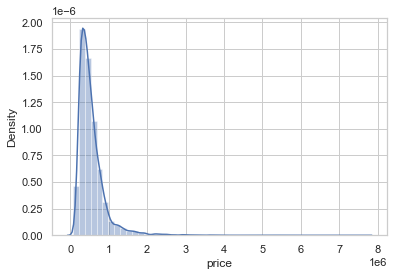

In [11]:
sns.distplot(df['price'])

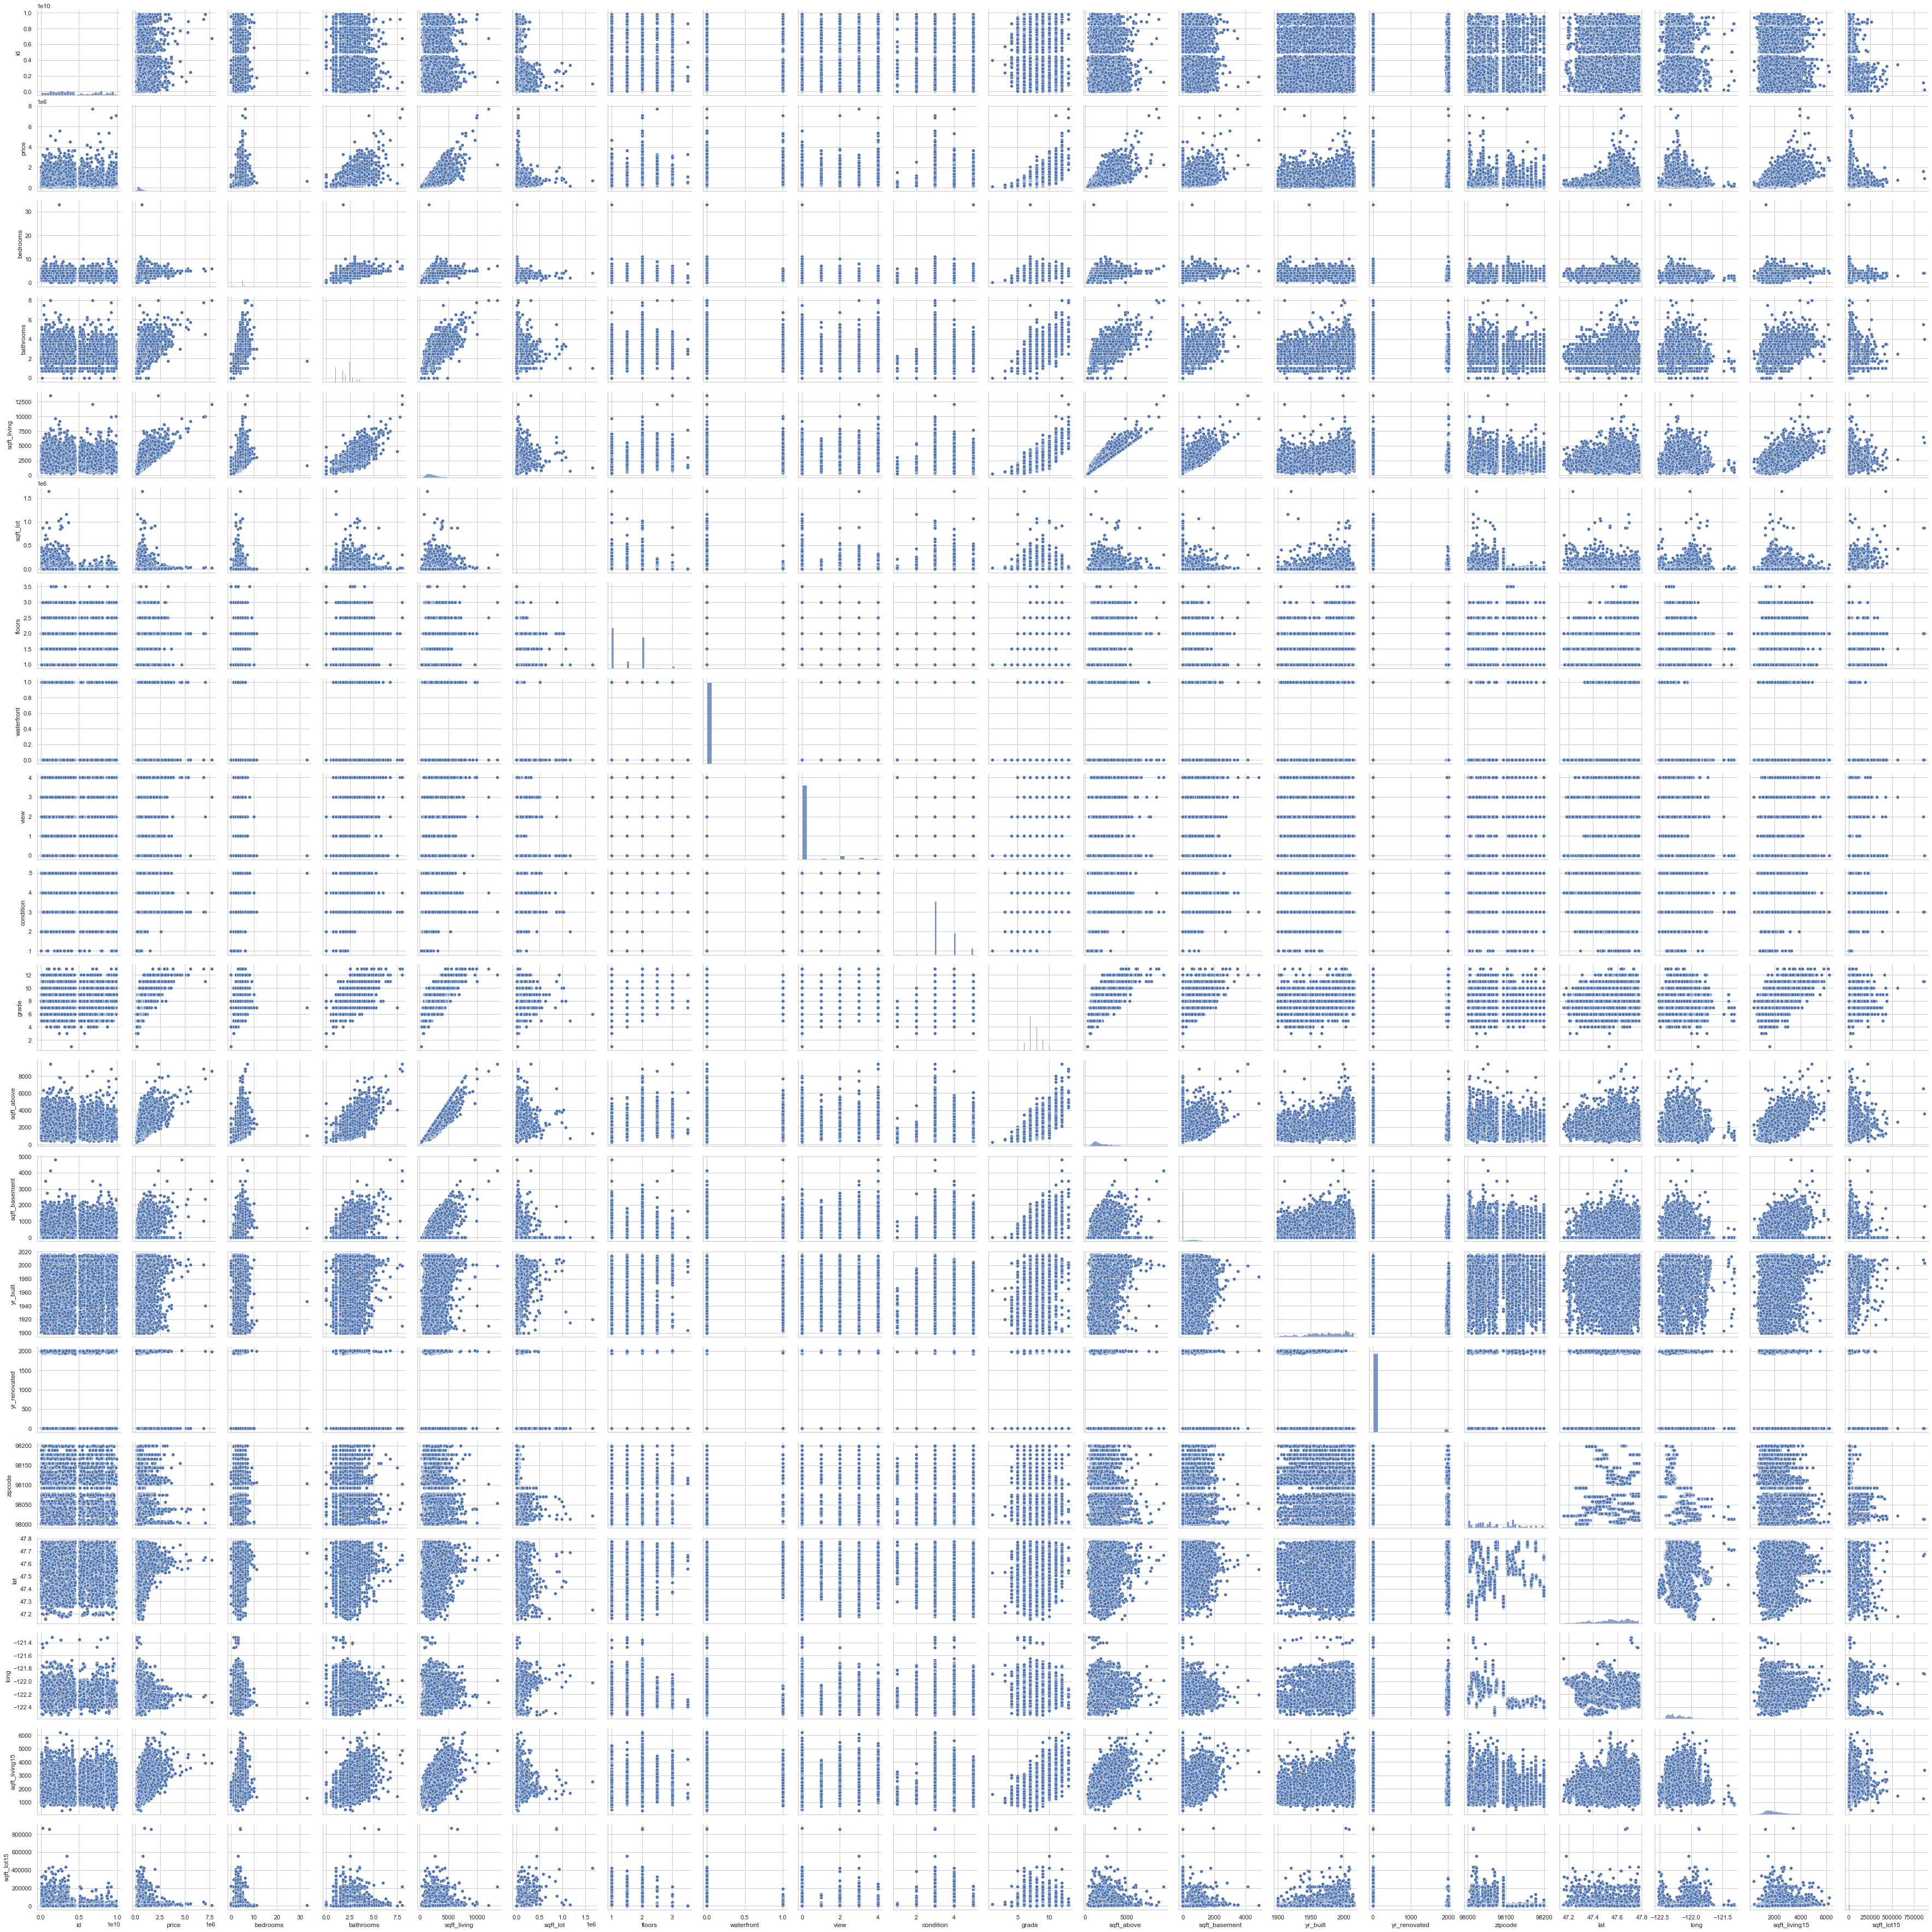

In [12]:
sns.pairplot(data=df)

<AxesSubplot:>

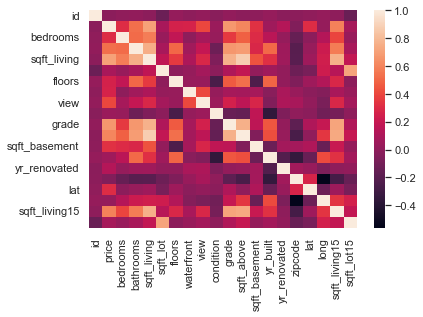

In [13]:
sns.heatmap(df.corr())

## Remove extraneous features

In [14]:
df2 = df.copy()
df2 = df2.drop(['id','lat','long', 'sqft_living'], axis=1)

In [15]:
df2.corr().sort_values('price', ascending=False)

price  bedrooms  bathrooms  sqft_lot    floors  waterfront  \
price          1.000000  0.308350   0.525138  0.089661  0.256794    0.266369   
grade          0.667434  0.356967   0.664983  0.113621  0.458183    0.082775   
sqft_above     0.605567  0.477600   0.685342  0.183512  0.523885    0.072075   
sqft_living15  0.585379  0.391638   0.568634  0.144608  0.279885    0.086463   
bathrooms      0.525138  0.515884   1.000000  0.087740  0.500653    0.063744   
view           0.397293  0.079532   0.187737  0.074710  0.029444    0.401857   
sqft_basement  0.323816  0.303093   0.283770  0.015286 -0.245705    0.080588   
bedrooms       0.308350  1.000000   0.515884  0.031703  0.175429   -0.006582   
waterfront     0.266369 -0.006582   0.063744  0.021604  0.023698    1.000000   
floors         0.256794  0.175429   0.500653 -0.005201  1.000000    0.023698   
yr_renovated   0.126434  0.018841   0.050739  0.007644  0.006338    0.092885   
sqft_lot       0.089661  0.031703   0.087740  1.000000 -0.005201    0.021604   
sqft_lot15     0.082447  0.029244   0.087175  0.718557 -0.011269    0.030703   
yr_built       0.054012  0.154178   0.506019  0.053080  0.489319   -0.026161   
condition      0.036362  0.028472  -0.124982 -0.008958 -0.263768    0.016653   
zipcode       -0.053203 -0.152668  -0.203866 -0.129574 -0.059121    0.030285   

                   view  condition     grade  sqft_above  sqft_basement  \
price          0.397293   0.036362  0.667434    0.605567       0.323816   
grade          0.251321  -0.144674  1.000000    0.755923       0.168392   
sqft_above     0.167649  -0.158214  0.755923    1.000000      -0.051943   
sqft_living15  0.280439  -0.092824  0.713202    0.731870       0.200355   
bathrooms      0.187737  -0.124982  0.664983    0.685342       0.283770   
view           1.000000   0.045990  0.251321    0.167649       0.276947   
sqft_basement  0.276947   0.174105  0.168392   -0.051943       1.000000   
bedrooms       0.079532   0.028472  0.356967    0.477600       0.303093   
waterfront     0.401857   0.016653  0.082775    0.072075       0.080588   
floors         0.029444  -0.263768  0.458183    0.523885      -0.245705   
yr_renovated   0.103917  -0.060618  0.014414    0.023285       0.071323   
sqft_lot       0.074710  -0.008958  0.113621    0.183512       0.015286   
sqft_lot15     0.072575  -0.003406  0.119248    0.194050       0.017276   
yr_built      -0.053440  -0.361417  0.446963    0.423898      -0.133124   
condition      0.045990   1.000000 -0.144674   -0.158214       0.174105   
zipcode        0.084827   0.003026 -0.184862   -0.261190       0.074845   

               yr_built  yr_renovated   zipcode  sqft_living15  sqft_lot15  
price          0.054012      0.126434 -0.053203       0.585379    0.082447  
grade          0.446963      0.014414 -0.184862       0.713202    0.119248  
sqft_above     0.423898      0.023285 -0.261190       0.731870    0.194050  
sqft_living15  0.326229     -0.002673 -0.279033       1.000000    0.183192  
bathrooms      0.506019      0.050739 -0.203866       0.568634    0.087175  
view          -0.053440      0.103917  0.084827       0.280439    0.072575  
sqft_basement -0.133124      0.071323  0.074845       0.200355    0.017276  
bedrooms       0.154178      0.018841 -0.152668       0.391638    0.029244  
waterfront    -0.026161      0.092885  0.030285       0.086463    0.030703  
floors         0.489319      0.006338 -0.059121       0.279885   -0.011269  
yr_renovated  -0.224874      1.000000  0.064357      -0.002673    0.007854  
sqft_lot       0.053080      0.007644 -0.129574       0.144608    0.718557  
sqft_lot15     0.070958      0.007854 -0.147221       0.183192    1.000000  
yr_built       1.000000     -0.224874 -0.346869       0.326229    0.070958  
condition     -0.361417     -0.060618  0.003026      -0.092824   -0.003406  
zipcode       -0.346869      0.064357  1.000000      -0.279033   -0.147221

In [16]:
from sklearn.preprocessing import OneHotEncoder

In [17]:
enc = OneHotEncoder()
enc.fit(df2['view'].array.reshape(-1,1))
view_col_names = enc.get_feature_names_out()
enc.transform([[0],[1],[2],[3],[4]]).toarray()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

<AxesSubplot:xlabel='condition', ylabel='grade'>

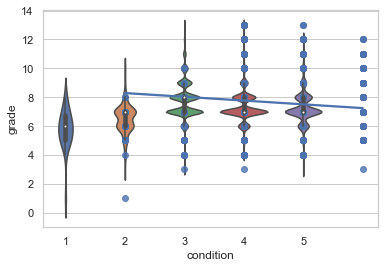

In [18]:
from statistics import linear_regression


sns.violinplot(x=df2.condition,y=df2.grade)
sns.regplot(x=df2.condition,y=df2.grade)